In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

# Load the dataset

In [5]:
spotify_data = pd.read_csv("spotify_songs_dataset.csv")
spotify_data

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SP49996,Event push do body.,Shelley Robinson,Wrong cup.,Pop,1999-05-26,272.0,38,25078113,Spanish,No,Indie,Melissa Wilson,Leslie Ferguson,Daniel Cruz
49996,SP49997,Share clearly role.,Jennifer Kennedy,That actually.,Folk,2016-08-21,355.0,62,29908581,Korean,Yes,Atlantic Records,Timothy Rice,Randall Martinez,NaN
49997,SP49998,Wonder type simply.,Hailey Walsh,South Democrat.,Pop,1997-02-28,207.0,38,75864558,Spanish,No,Atlantic Records,Susan Diaz,Katrina Fleming,NaN
49998,SP49999,Company.,Leah Coleman,Front.,Electronic,1996-07-15,266.0,10,41817978,English,No,Sony Music,Dr. Zachary Bell,Pam Schultz,NaN


# ---------------------------- Data Preprocessing ----------------------------


In [6]:
spotify_data.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [7]:
spotify_data.shape

(50000, 15)

In [44]:
spotify_data.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='object')

In [8]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


In [9]:
spotify_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,45000.0,2.396592e+02,5.013673e+01,33.0,206.0,240.0,273.0,433.0
popularity,50000.0,5.078344e+01,2.894875e+01,1.0,26.0,51.0,76.0,100.0
stream,50000.0,5.019183e+07,2.893624e+07,1899.0,25233107.5,50421686.0,75190637.5,99999128.0


Data Cleaning

 Handle missing values


In [10]:
spotify_data.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

In [11]:
spotify_data['duration'].fillna(spotify_data['duration'].mean(), inplace=True)  # Fill NaNs in duration with mean
spotify_data['language'].fillna('Unknown', inplace=True) # Fill missing language with 'Unknown'


In [12]:
spotify_data.duplicated().sum()

0

# Drop non-essential columns for classification

In [13]:
columns_to_drop = ['song_id', 'song_title', 'artist', 'album', 'release_date', 
                   'label', 'composer', 'producer', 'collaboration']
spotify_data_cleaned = spotify_data.drop(columns=columns_to_drop)

# Convert categorical features into numerical values using Label Encoding

In [14]:
label_encoders = {}
for col in ['genre', 'language', 'explicit_content']:
    le = LabelEncoder()
    spotify_data_cleaned[col] = le.fit_transform(spotify_data_cleaned[col])
    label_encoders[col] = le

# Pairplot for numerical data to visualize correlations

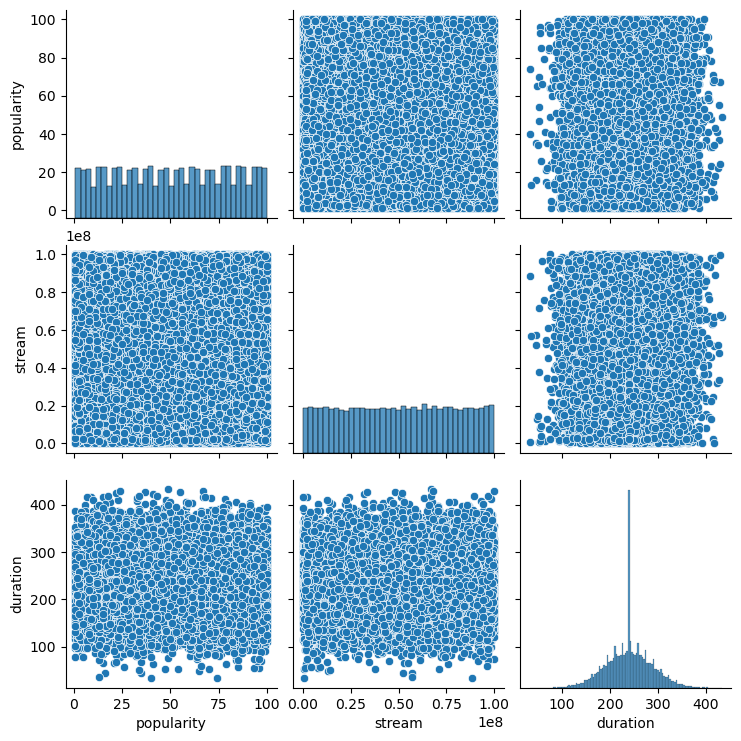

In [15]:
sns.pairplot(spotify_data_cleaned[['popularity', 'stream', 'duration']])
plt.show()

In [16]:
# Sort songs by popularity
top_popular_songs = spotify_data[['song_title', 'artist', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

In [17]:
top_popular_songs

,song_title,artist,popularity
3778,Clear range house.,Paul Fisher,100
8043,Guess huge.,Stephanie Vasquez,100
32632,Seek strong.,Taylor Harris,100
32634,School provide crime investment.,Anthony Meyer,100
34220,Detail.,Kristen Mendez,100
38917,Have particularly kitchen.,Alec Clark,100
28728,Low seat.,Jeffrey Beck,100
44332,Manage unit city.,Cathy Diaz,100
20025,Traditional nothing.,Andrew Vaughn,100
7932,Also share large.,Jose Armstrong,100


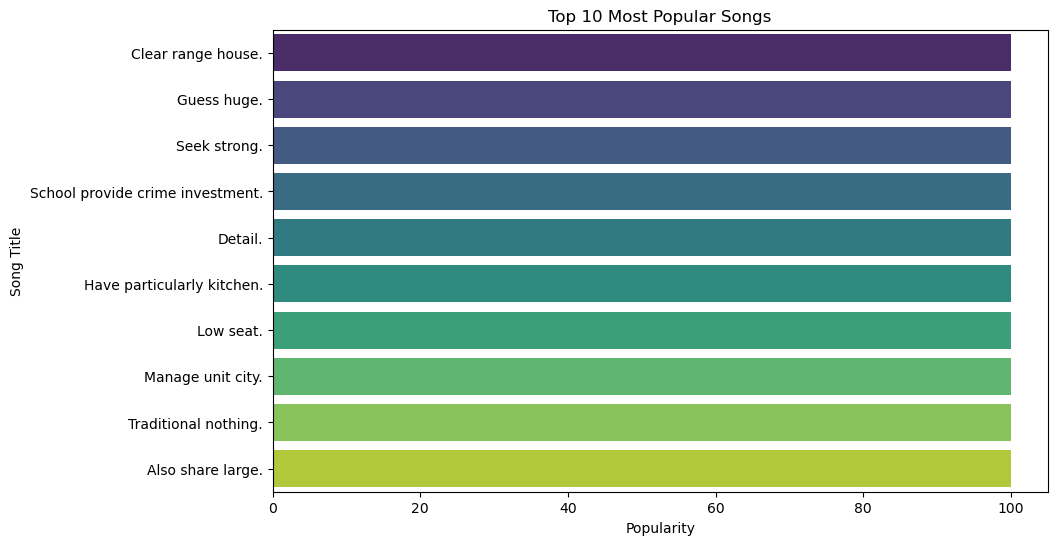

In [18]:
# Barplot of top 10 songs by popularity
plt.figure(figsize=(10, 6))
sns.barplot(data=top_popular_songs, x='popularity', y='song_title', palette='viridis')
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Title')
plt.show()

Which languages are most common, and how does language affect popularity?¶

In [19]:
# Count of songs by language
language_counts = spotify_data['language'].value_counts()

print(language_counts.head(10))

# Average popularity by language
language_popularity = spotify_data.groupby('language')['popularity'].mean().sort_values(ascending=False)

print(language_popularity.head(10))

English     33299
Spanish      4725
Unknown      2500
French       2419
Korean       2328
Italian      1902
Japanese     1417
German       1410
Name: language, dtype: int64
language
German      51.637589
Italian     51.139327
English     50.899036
French      50.763125
Spanish     50.400635
Japanese    50.335921
Unknown     50.192800
Korean      50.026632
Name: popularity, dtype: float64


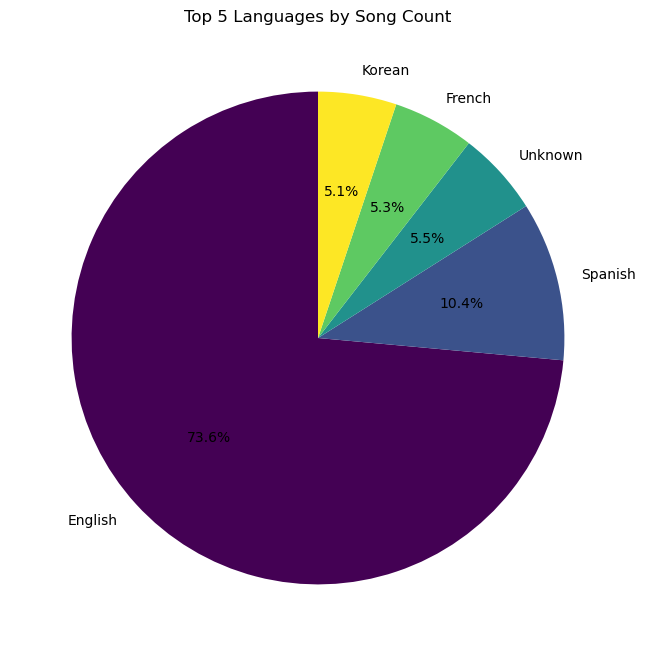

In [20]:
# Pie chart for language distribution
plt.figure(figsize=(8, 8))
spotify_data['language'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Top 5 Languages by Song Count')
plt.ylabel('')
plt.show()

How has song popularity evolved over the years?¶

In [21]:
# Convert release_date to datetime and extract year
spotify_data['release_date'] = pd.to_datetime(spotify_data['release_date'])
spotify_data['release_year'] = spotify_data['release_date'].dt.year

# Average popularity by year
yearly_popularity = spotify_data.groupby('release_year')['popularity'].mean()

print(yearly_popularity)


release_year
1994    50.067568
1995    50.014802
1996    50.823877
1997    52.466667
1998    50.500595
1999    51.148328
2000    51.611307
2001    50.869863
2002    50.491637
2003    51.273939
2004    50.035067
2005    50.668047
2006    50.305706
2007    50.734356
2008    50.431629
2009    49.843998
2010    50.085732
2011    50.601449
2012    51.170031
2013    51.005981
2014    50.246869
2015    51.395961
2016    52.077110
2017    50.269053
2018    50.420189
2019    52.321491
2020    50.533333
2021    49.971564
2022    51.290076
2023    49.950860
2024    51.074074
Name: popularity, dtype: float64


Line plot for popularity over the years

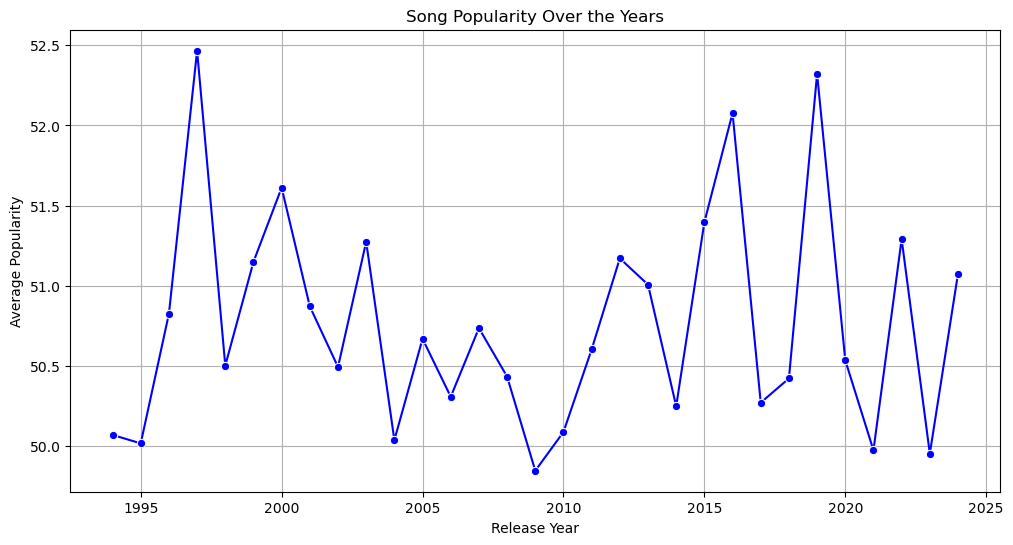

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='blue')
plt.title('Song Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

Do songs with explicit content tend to be more popular?¶

In [23]:
# Average popularity for explicit vs non-explicit songs
explicit_popularity = spotify_data.groupby('explicit_content')['popularity'].mean()

print(explicit_popularity)


explicit_content
No     50.917004
Yes    50.650759
Name: popularity, dtype: float64


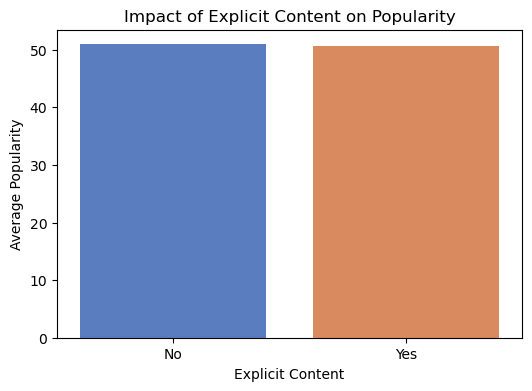

In [24]:
# Barplot for explicit vs non-explicit popularity
plt.figure(figsize=(6, 4))
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='muted')
plt.title('Impact of Explicit Content on Popularity')
plt.xlabel('Explicit Content')
plt.ylabel('Average Popularity')
plt.show()

# Heatmap to show correlations

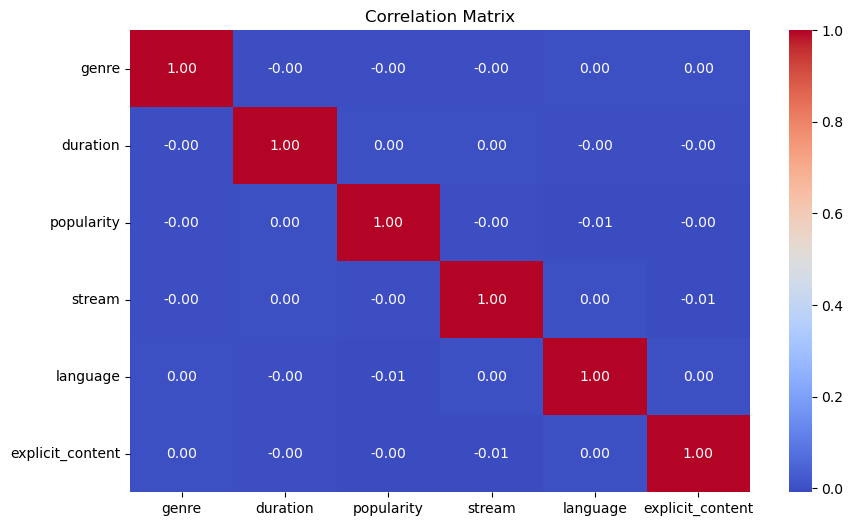

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(spotify_data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Create a new feature: stream-to-popularity ratio

In [26]:
spotify_data_cleaned['stream_popularity_ratio'] = spotify_data_cleaned['stream'] / (spotify_data_cleaned['popularity'] + 1)

Define features (X) and target (y)

In [27]:
X = spotify_data_cleaned.drop(columns=['popularity'])  # Use all but 'popularity' as features
y = (spotify_data_cleaned['popularity'] >= 50).astype(int)  # Binary target: popular (1) or not (0)


In [28]:
X

,genre,duration,stream,language,explicit_content,stream_popularity_ratio
0,2,282.000000,35055874,0,1,8.152529e+05
1,2,127.000000,9249527,0,1,1.813633e+05
2,6,239.659178,76669110,0,1,6.969919e+06
3,4,214.000000,34732016,0,0,3.992186e+05
4,6,273.000000,96649372,0,1,1.510146e+06
...,...,...,...,...,...,...
49995,6,272.000000,25078113,6,0,6.430285e+05
49996,3,355.000000,29908581,5,1,4.747394e+05
49997,6,207.000000,75864558,6,0,1.945245e+06
49998,2,266.000000,41817978,0,0,3.801634e+06


In [29]:
y

0        0
1        1
2        0
3        1
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: popularity, Length: 50000, dtype: int32

# Scale the features

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split into train and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[4865    0]
 [   0 5135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4865
           1       1.00      1.00      1.00      5135

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



# knn

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4865
           1       0.78      0.90      0.83      5135

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

KNN Accuracy: 0.81


# Random Forest

In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
rf_pred = model.predict(X_test)
cm = confusion_matrix(y_test, rf_pred)
print(cm)
print(classification_report(y_test, rf_pred))

[[4865    0]
 [5135    0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.65      4865
           1       0.00      0.00      0.00      5135

    accuracy                           0.49     10000
   macro avg       0.24      0.50      0.33     10000
weighted avg       0.24      0.49      0.32     10000



# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
dtc_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, dtc_pred)
print(cm)
print(classification_report(y_test, dtc_pred))

[[4834   31]
 [  27 5108]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4865
           1       0.99      0.99      0.99      5135

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Support Vector Machine (SVM)

In [40]:
from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, classification_report
svm= SVC()
svm.fit(X_train,y_train)

SVC()

In [41]:
svm_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, svm_pred)
print(cm)
print(classification_report(y_test, svm_pred))

[[3391 1474]
 [   0 5135]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      4865
           1       0.78      1.00      0.87      5135

    accuracy                           0.85     10000
   macro avg       0.89      0.85      0.85     10000
weighted avg       0.89      0.85      0.85     10000



# Confusion Matrix

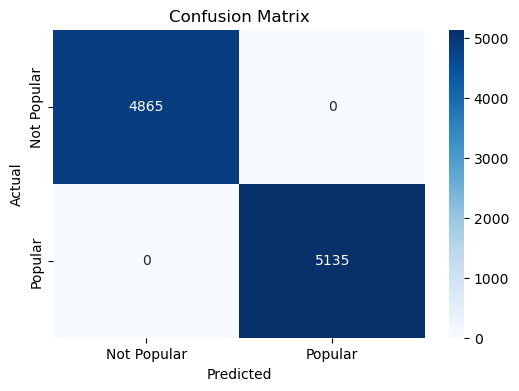

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

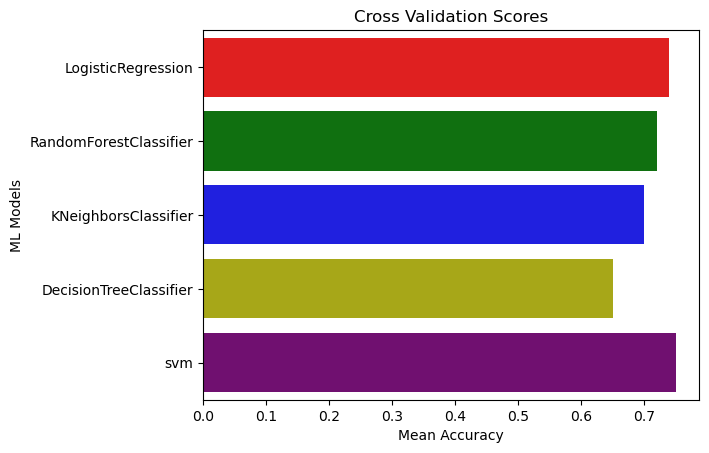

In [47]:
cv_results = pd.DataFrame({
 "Cross Validation Means": [0.74,0.72,0.70,0.65,0.75],
 "ML Models": ["LogisticRegression","RandomForestClassifier","KNeighborsClassifier",
               "DecisionTreeClassifier","svm"]
})

# Use sns.barplot with data as the DataFrame
colour=['r','g','b','y','purple']
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results,palette=colour)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()

# Conclusion

In this project, we build various models like logistic regression, randomforest classifier, KNeighbours classifier, DecisionTree classifier, SVM. A SVM gives the highest accuracy score of 85.00 percent among all the ML Models.
So for the popularity prediction SVM is best model.